In [1]:
import tensorflow as tf
from scipy.io import loadmat
import matplotlib.pyplot as plt
import random
import os
import numpy as np
import imageio
import pickle

from scipy import ndimage
from tensorflow.keras import regularizers
from tensorflow.keras.utils import to_categorical

tf.keras.backend.set_floatx('float64')
large_mnist = "../Lab 1/notMNIST_large"
small_mnist = "../Lab 1/notMNIST_small"

# Load data

Train data size: 194419. Val data size: 10000. Test data size: 19000


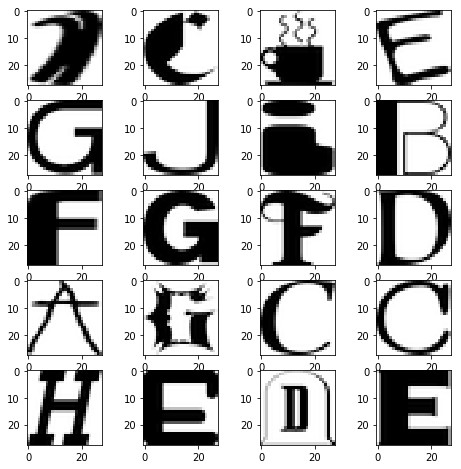

In [11]:
def load_data():
    return load_from_pickle("_train.pickle"), load_from_pickle("_val.pickle"), load_from_pickle("_test.pickle")

def load_from_pickle(pickle_name):
    with open(large_mnist + pickle_name, 'rb') as f:
        return pickle.load(f)
    
train_data, val_data, test_data = load_data()
print("Train data size: %d. Val data size: %d. Test data size: %d" % (len(train_data), len(val_data), len(test_data)))

fig = plt.figure(figsize=(8, 8))
columns, rows = 4, 5
for i in range(1, columns * rows + 1):
    img = random.choice(train_data)[0]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img.reshape(28, 28), interpolation='nearest', cmap='Greys')
plt.show()

In [12]:
def unzip(tuples):
    first = [t[0] for t in tuples]
    second = [t[1] for t in tuples]
    return np.array(first), np.array(second)

train_x, train_y = unzip(train_data)
val_x, val_y = unzip(val_data)
test_x, test_y = unzip(test_data)

In [17]:
from tensorflow.keras import layers, Model, Input, Sequential
from tensorflow.keras.layers import Dense, Dropout

num_classes = 10

model = Sequential([
    Dense(784, activation="relu", input_shape=(784,)),
    Dense(250, activation="tanh"),
    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 250)               196250    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2510      
Total params: 814,200
Trainable params: 814,200
Non-trainable params: 0
_________________________________________________________________


In [18]:
history = model.fit(train_x, train_y, epochs=15, batch_size=32, validation_data=(val_x, val_y))

Train on 194419 samples, validate on 10000 samples
Epoch 1/15
194419/194419 [==============================] - 34s 176us/sample - loss: 0.5954 - accuracy: 0.8333 - val_loss: 0.5036 - val_accuracy: 0.8541
Epoch 2/15
194419/194419 [==============================] - 35s 178us/sample - loss: 0.4698 - accuracy: 0.8633 - val_loss: 0.4402 - val_accuracy: 0.8699
Epoch 3/15
194419/194419 [==============================] - 35s 178us/sample - loss: 0.4199 - accuracy: 0.8767 - val_loss: 0.4057 - val_accuracy: 0.8818
Epoch 4/15
194419/194419 [==============================] - 35s 178us/sample - loss: 0.3854 - accuracy: 0.8867 - val_loss: 0.3862 - val_accuracy: 0.8851
Epoch 5/15
194419/194419 [==============================] - 35s 177us/sample - loss: 0.3587 - accuracy: 0.8943 - val_loss: 0.3672 - val_accuracy: 0.8907
Epoch 6/15
194419/194419 [==============================] - 35s 180us/sample - loss: 0.3366 - accuracy: 0.9007 - val_loss: 0.3540 - val_accuracy: 0.8943
Epoch 7/15
194419/194419 [=====

19000/19000 [==============================] - 1s 77us/sample - loss: 0.3513 - accuracy: 0.8999


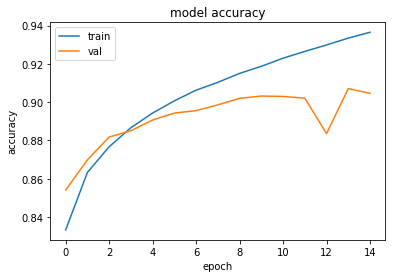

In [19]:
model.evaluate(test_x, test_y)

def plot_history(training_history):
    plt.plot(training_history.history['accuracy'])
    plt.plot(training_history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
    
plot_history(history)

In [25]:
model = Sequential([
    Dense(784, activation="relu", input_shape=(784,)),
    Dropout(0.1),
    Dense(250, activation="tanh", 
          kernel_regularizer=tf.keras.regularizers.l2(l=0.1)),
    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_2 (Dropout)          (None, 784)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 250)               196250    
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2510      
Total params: 814,200
Trainable params: 814,200
Non-trainable params: 0
_________________________________________________________________


In [26]:
history = model.fit(train_x, train_y, epochs=40, batch_size=32, validation_data=(val_x, val_y))

Train on 194419 samples, validate on 10000 samples
Epoch 1/40
194419/194419 [==============================] - 29s 148us/sample - loss: 2.3916 - accuracy: 0.8111 - val_loss: 0.7279 - val_accuracy: 0.8271
Epoch 2/40
194419/194419 [==============================] - 28s 144us/sample - loss: 0.6858 - accuracy: 0.8312 - val_loss: 0.6545 - val_accuracy: 0.8389
Epoch 3/40
194419/194419 [==============================] - 28s 146us/sample - loss: 0.6387 - accuracy: 0.8378 - val_loss: 0.6177 - val_accuracy: 0.8406
Epoch 4/40
194419/194419 [==============================] - 28s 146us/sample - loss: 0.6100 - accuracy: 0.8433 - val_loss: 0.5991 - val_accuracy: 0.8473
Epoch 5/40
194419/194419 [==============================] - 28s 146us/sample - loss: 0.5914 - accuracy: 0.8469 - val_loss: 0.5846 - val_accuracy: 0.8508
Epoch 6/40
194419/194419 [==============================] - 28s 145us/sample - loss: 0.5763 - accuracy: 0.8503 - val_loss: 0.5776 - val_accuracy: 0.8527
Epoch 7/40
194419/194419 [=====

19000/19000 [==============================] - 1s 65us/sample - loss: 0.4519 - accuracy: 0.8875


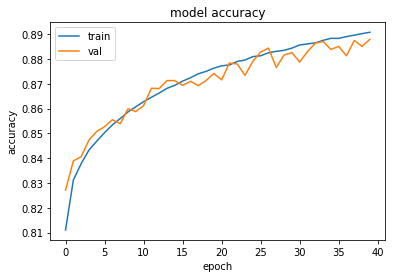

In [27]:
model.evaluate(test_x, test_y)
plot_history(history)

In [34]:
model = Sequential([
    Dense(784, activation="relu", input_shape=(784,)),
    Dropout(0.1),
    Dense(392, activation="relu"),
    Dropout(0.1),
    Dense(250, activation="relu"),
    Dropout(0.1),
    Dense(250, activation="relu"),
    Dropout(0.1),
    Dense(100, activation="relu"),
    Dense(num_classes, activation="softmax")
])

model.compile(
    optimizer="adam", 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy'])

model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 784)               615440    
_________________________________________________________________
dropout_14 (Dropout)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 392)               307720    
_________________________________________________________________
dropout_15 (Dropout)         (None, 392)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 250)               98250     
_________________________________________________________________
dropout_16 (Dropout)         (None, 250)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 250)              

In [35]:
history = model.fit(train_x, train_y, epochs=25, batch_size=32, validation_data=(val_x, val_y))

Train on 194419 samples, validate on 10000 samples
Epoch 1/25
194419/194419 [==============================] - 69s 355us/sample - loss: 0.5266 - accuracy: 0.8418 - val_loss: 0.4221 - val_accuracy: 0.8713
Epoch 2/25
194419/194419 [==============================] - 68s 352us/sample - loss: 0.4201 - accuracy: 0.8741 - val_loss: 0.3763 - val_accuracy: 0.8889
Epoch 3/25
194419/194419 [==============================] - 69s 354us/sample - loss: 0.3840 - accuracy: 0.8846 - val_loss: 0.3538 - val_accuracy: 0.8965
Epoch 4/25
194419/194419 [==============================] - 69s 354us/sample - loss: 0.3604 - accuracy: 0.8909 - val_loss: 0.3574 - val_accuracy: 0.8974
Epoch 5/25
194419/194419 [==============================] - 69s 353us/sample - loss: 0.3426 - accuracy: 0.8957 - val_loss: 0.3465 - val_accuracy: 0.9009
Epoch 6/25
194419/194419 [==============================] - 69s 354us/sample - loss: 0.3299 - accuracy: 0.9000 - val_loss: 0.3347 - val_accuracy: 0.9022
Epoch 7/25
194419/194419 [=====

19000/19000 [==============================] - 2s 84us/sample - loss: 0.3533 - accuracy: 0.9082


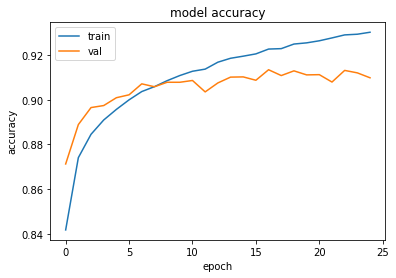

In [36]:
model.evaluate(test_x, test_y)
plot_history(history)

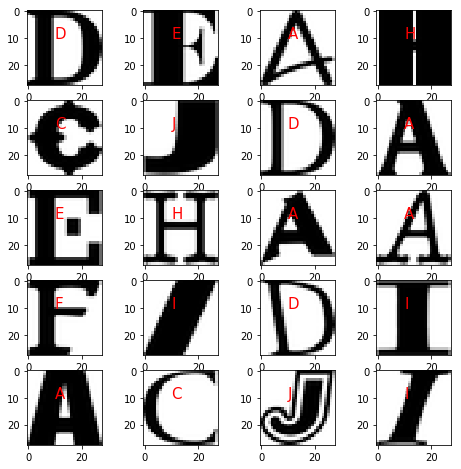

In [74]:
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns * rows + 1):
    img = random.choice(test_data)[0]
    prediction = np.argmax(model.predict(np.array([img]))[0])
    letter = available_classes[prediction]
    img = img.reshape(28, 28)
    fig.add_subplot(rows, columns, i)
    plt.text(10, 10, letter, color='red', fontsize=15)
    plt.imshow(img, interpolation='nearest', cmap='Greys')

plt.show()